In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

main = pd.read_csv(r'Student Depression Dataset.csv')
main.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [151]:
main = main.drop(['id'], axis=1)

In [152]:
main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main.head(3)


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [153]:
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [154]:
main['City'].value_counts()[main['City'].value_counts() < 600]

City
Nashik                547
Faridabad             461
Saanvi                  2
Bhavna                  2
City                    2
Harsha                  2
Less Delhi              1
M.Tech                  1
3.0                     1
Less than 5 Kalyan      1
Mira                    1
Vaanya                  1
Gaurav                  1
Harsh                   1
Reyansh                 1
Kibara                  1
Rashi                   1
ME                      1
M.Com                   1
Nalyan                  1
Mihir                   1
Nalini                  1
Nandini                 1
Khaziabad               1
Name: count, dtype: int64

In [155]:
cities_to_remove = main['City'].value_counts()[main['City'].value_counts() < 600]
main = main[~main['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Name: count, dtype: int64

In [156]:
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [157]:
main['Profession'].value_counts()

Profession
Student                   26836
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [158]:
main = main.loc[main['Profession'] == 'Student']
main['Profession'].value_counts()

Profession
Student    26836
Name: count, dtype: int64

In [159]:
main = main.drop(['Profession'], axis=1)

In [160]:
main['Work Pressure'].value_counts()

Work Pressure
0.0    26833
5.0        2
2.0        1
Name: count, dtype: int64

In [161]:
main = main.drop(['Work Pressure'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [162]:
main['Age'].value_counts()

Age
20.0    2198
24.0    2120
28.0    2058
29.0    1870
33.0    1834
25.0    1729
21.0    1662
23.0    1581
18.0    1535
19.0    1514
34.0    1392
27.0    1374
31.0    1366
32.0    1197
22.0    1131
26.0    1116
30.0    1112
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
43.0       2
37.0       2
51.0       1
49.0       1
58.0       1
44.0       1
54.0       1
56.0       1
46.0       1
41.0       1
Name: count, dtype: int64

In [163]:
main = main.loc[main['Age'] <= 30]
main['Age'].value_counts()

Age
20.0    2198
24.0    2120
28.0    2058
29.0    1870
25.0    1729
21.0    1662
23.0    1581
18.0    1535
19.0    1514
27.0    1374
22.0    1131
26.0    1116
30.0    1112
Name: count, dtype: int64

In [164]:
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5598
5.0    5012
4.0    3983
1.0    3381
2.0    3019
0.0       7
Name: count, dtype: int64

In [165]:
main = main.loc[main['Academic Pressure'] > 0]
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5598
5.0    5012
4.0    3983
1.0    3381
2.0    3019
Name: count, dtype: int64

In [166]:
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4656
2.0    4525
3.0    4312
1.0    4168
5.0    3331
0.0       1
Name: count, dtype: int64

In [167]:
main = main.loc[main['Study Satisfaction'] > 0]
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4656
2.0    4525
3.0    4312
1.0    4168
5.0    3331
Name: count, dtype: int64

In [168]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [169]:
main = main.drop(['Job Satisfaction'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [170]:
main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6293
7-8 hours            5533
5-6 hours            4612
More than 8 hours    4542
Name: count, dtype: int64

In [171]:
main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    6293
2    5533
1    4612
3    4542
Name: count, dtype: int64

In [172]:
main['Dietary Habits'].value_counts()
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8068
Moderate     7350
Healthy      5553
Name: count, dtype: int64

In [173]:
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
1    8068
2    7350
0    5553
Name: count, dtype: int64

In [174]:
main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'MSc', 'BHM',
       'M.Ed', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'B.Tech', 'BBA', 'M.Com', 'ME', 'MBA',
       'LLM', 'LLB', 'Others', 'MHM'], dtype=object)

In [175]:
main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']
main['New_Degree'].value_counts()

New_Degree
Graduated           9464
Higher Secondary    5660
Post Graduated      4682
Name: count, dtype: int64

In [176]:
main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
main['New_Degree'].value_counts()


New_Degree
0    9464
2    5660
1    4682
Name: count, dtype: int64

In [177]:
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    13770
No      7175
Name: count, dtype: int64

In [178]:
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    13770
0     7175
Name: count, dtype: int64

In [179]:
main['Work/Study Hours'].value_counts()
## the zero is weird

Work/Study Hours
10.0    3238
12.0    2357
11.0    2238
8.0     1865
6.0     1694
9.0     1547
7.0     1542
0.0     1214
2.0     1195
4.0     1174
3.0     1063
5.0      961
1.0      857
Name: count, dtype: int64

In [180]:
main['Financial Stress'].value_counts()

Financial Stress
5.0    5294
4.0    4438
3.0    3907
2.0    3746
1.0    3558
Name: count, dtype: int64

In [181]:
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     10816
Yes    10129
Name: count, dtype: int64

In [182]:
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    10816
1    10129
Name: count, dtype: int64

In [183]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,1.0,1.0,0,0,1


In [184]:
main = main.dropna()

main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


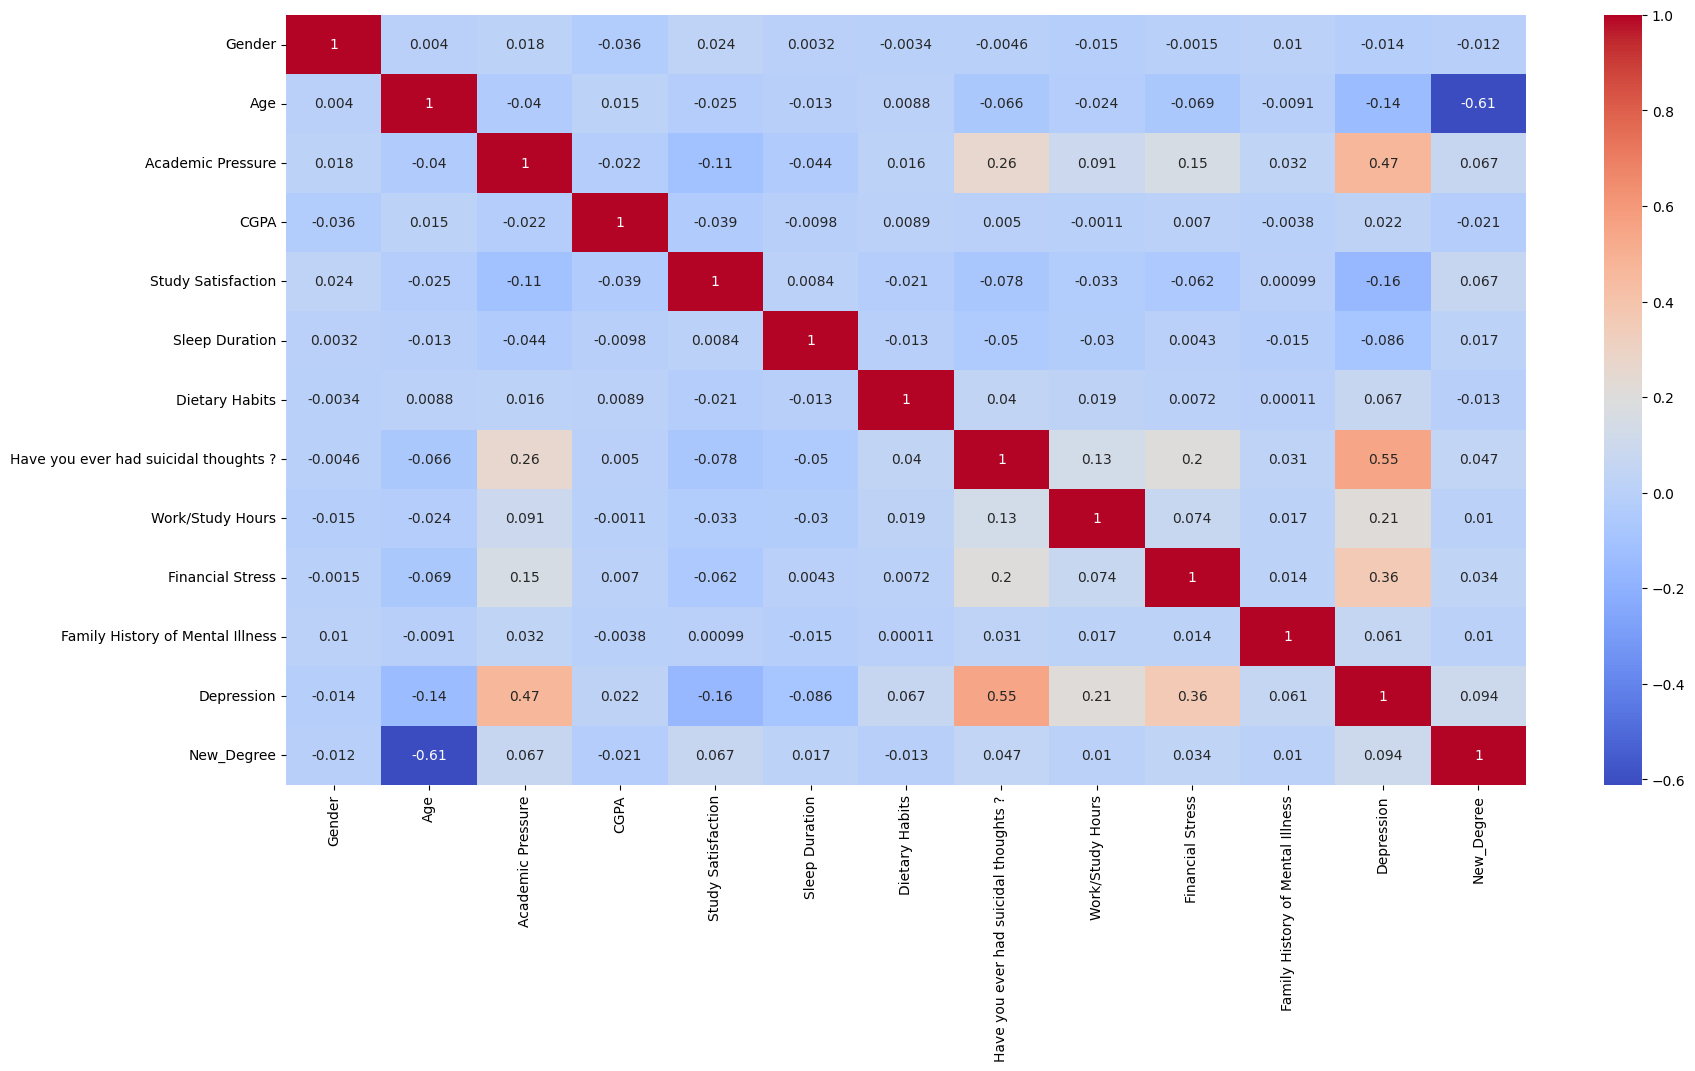

In [185]:
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [186]:
main

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,1.0,1.0,0,0,1
6,0,30.0,Thane,3.0,9.54,4.0,2,0,BSc,0,1.0,2.0,0,0,0
7,1,30.0,Chennai,2.0,8.04,4.0,0,1,Class 12,0,0.0,1.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,1,24.0,Hyderabad,3.0,6.02,2.0,2,2,B.Arch,0,8.0,2.0,0,0,0
27896,1,27.0,Surat,5.0,5.75,5.0,1,1,Class 12,1,7.0,1.0,1,0,2
27897,0,27.0,Ludhiana,2.0,9.40,3.0,0,0,MSc,0,0.0,3.0,1,0,1
27899,1,18.0,Ludhiana,5.0,6.88,2.0,0,0,Class 12,1,10.0,5.0,0,1,2


In [ ]:

# Supondo que seu DataFrame principal é 'main'

# Instanciar o encoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False para obter diretamente um array denso

# Transformar a coluna 'City'
encoded = encoder.fit_transform(main[['City']])

# Converter o resultado em DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
encoded_df.index = main.index
# Concatenar o DataFrame original com os dados codificados
main_encoded = pd.concat([main, encoded_df], axis=1)

main_encoded


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,30.0,Thane,3.0,9.54,4.0,2,0,BSc,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1,30.0,Chennai,2.0,8.04,4.0,0,1,Class 12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,1,24.0,Hyderabad,3.0,6.02,2.0,2,2,B.Arch,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27896,1,27.0,Surat,5.0,5.75,5.0,1,1,Class 12,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27897,0,27.0,Ludhiana,2.0,9.40,3.0,0,0,MSc,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27899,1,18.0,Ludhiana,5.0,6.88,2.0,0,0,Class 12,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)


In [ ]:


X = main_encoded.drop('Depression', axis=1).values  # Features
y = main_encoded['Depression'].values  # Target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar apenas as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regressão logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Avaliação
score = model.score(X_test_scaled, y_test)
print(f"Acurácia: {score:.2f}")


Acurácia: 0.85


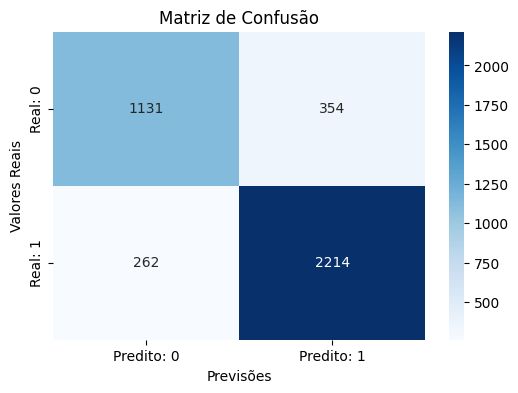

In [ ]:


# Gerar a matriz de confusão
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()
